In [1]:
import pandas as pd

data=pd.read_csv("loadmetro.csv" )

#data

In [2]:
# Specify the columns you want to keep
columns_to_keep = ['datetime','Load', 'T2M']

# Use indexing to select the desired columns
df = data[columns_to_keep]
# set the 'datetime_column' as the index
df.set_index('datetime', inplace=True)
df

,Load,T2M
datetime,,
2019-03-21 00:00:00,352.862799,-2.26
2019-03-21 01:00:00,330.444853,-1.89
2019-03-21 02:00:00,287.419792,-1.77
2019-03-21 03:00:00,258.110368,-1.86
2019-03-21 04:00:00,247.745866,-2.07
...,...,...
2021-09-22 19:00:00,632.235500,17.97
2021-09-22 20:00:00,612.703162,17.16
2021-09-22 21:00:00,589.574385,16.23


In [3]:
train_size = int(len(df) * 0.8)  # Calculate the size of the training set as 60% of the total data length
test_size = len(df) - train_size  # Calculate the size of the test set as the remaining 40% of the data

# Split the DataFrame 'df' into the training set and test set
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(len(train), len(test))  # Print the lengths of the training set and test set

test_size = int(len(test) * 0.5)  # Calculate the new size of the test set as 50% of the current test set length
val_size = len(test) - test_size  # Calculate the size of the validation set as the remaining 50% of the current test set

# Split the current test set into the validation set and a new test set
val, test = test.iloc[0:test_size], test.iloc[test_size:len(test)]
print(len(val), len(test))  # Print the lengths of the training set and test set


17606 4402
2201 2201


In [4]:
train

,Load,T2M
datetime,,
2019-03-21 00:00:00,352.862799,-2.26
2019-03-21 01:00:00,330.444853,-1.89
2019-03-21 02:00:00,287.419792,-1.77
2019-03-21 03:00:00,258.110368,-1.86
2019-03-21 04:00:00,247.745866,-2.07
...,...,...
2021-03-23 09:00:00,255.124590,13.06
2021-03-23 10:00:00,277.647667,13.30
2021-03-23 11:00:00,296.246891,14.08


In [5]:
val

,Load,T2M
datetime,,
2021-03-23 14:00:00,298.892484,14.74
2021-03-23 15:00:00,298.028399,14.66
2021-03-23 16:00:00,302.942181,13.38
2021-03-23 17:00:00,310.834565,10.65
2021-03-23 18:00:00,321.126720,8.97
...,...,...
2021-06-23 02:00:00,581.069337,17.07
2021-06-23 03:00:00,562.551994,16.43
2021-06-23 04:00:00,550.519091,15.87


In [6]:
test

,Load,T2M
datetime,,
2021-06-23 07:00:00,551.157958,27.83
2021-06-23 08:00:00,599.464707,30.92
2021-06-23 09:00:00,644.483951,32.97
2021-06-23 10:00:00,682.184514,34.49
2021-06-23 11:00:00,713.573188,35.48
...,...,...
2021-09-22 19:00:00,632.235500,17.97
2021-09-22 20:00:00,612.703162,17.16
2021-09-22 21:00:00,589.574385,16.23


In [7]:
"""The code performs feature scaling using MinMaxScaler from the scikit-learn library. It first fits the scaler on the training data and then applies the transformation to the training, validation, and test sets."""

from sklearn.preprocessing import MinMaxScaler  # Import the MinMaxScaler class from the sklearn.preprocessing module

f_columns = ['T2M']  # Define a list of column names to be transformed

f_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for feature transformation
t_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for target transformation

f_transformer = f_transformer.fit(train[f_columns].to_numpy())  # Fit the feature transformer to the training data
t_transformer = t_transformer.fit(train[['Load']])  # Fit the target transformer to the training data

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())  # Apply feature transformation to the training data
train['Load'] = t_transformer.transform(train[['Load']])  # Apply target transformation to the training data

val.loc[:, f_columns] = f_transformer.transform(val[f_columns].to_numpy())  # Apply feature transformation to the validation data
val['Load'] = t_transformer.transform(val[['Load']])  # Apply target transformation to the validation data

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())  # Apply feature transformation to the test data
test['Load'] = t_transformer.transform(test[['Load']])  # Apply target transformation to the test data


<ipython-input-7-7f8acb0a235b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())  # Apply feature transformation to the training data
<ipython-input-7-7f8acb0a235b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Load'] = t_transformer.transform(train[['Load']])  # Apply target transformation to the training data


In [8]:
"""The code defines a function called create_dataset that takes in input features X, target variable y, and a parameter time_steps. It creates a dataset suitable for time series forecasting by splitting the input features and target variable into sequences of length time_steps."""
import numpy as np
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []  # Initialize empty lists to store the input sequences (Xs) and corresponding target values (ys)
    for i in range(len(X) - time_steps):  # Iterate over the range of indices up to the length of X minus time_steps
        v = X.iloc[i:(i + time_steps)].values  # Extract a sequence of length time_steps from X
        Xs.append(v)  # Append the sequence to Xs
        ys.append(y.iloc[i + time_steps])  # Append the corresponding target value to ys
    return np.array(Xs), np.array(ys)  # Convert Xs and ys to NumPy arrays and return them





"""The code sets the value of time_steps to 24, which represents the number of time steps or previous observations to consider for each sample in the dataset. It then uses the create_dataset function to create training, validation, and test datasets by reshaping the input features and target variables into the appropriate format."""

time_steps = 24  # Set the number of time steps to 24

X_train, y_train = create_dataset(train, train.Load, time_steps)  # Create the training dataset using the 'create_dataset' function

X_validate, y_validate = create_dataset(val, val.Load, time_steps)  # Create the validation dataset using the 'create_dataset' function

X_test, y_test = create_dataset(test, test.Load, time_steps)  # Create the test dataset using the 'create_dataset' function

In [9]:
print(X_train.shape,y_train.shape, X_validate.shape, y_validate.shape,X_test.shape,  y_test.shape)

(17582, 24, 2) (17582,) (2177, 24, 2) (2177,) (2177, 24, 2) (2177,)


In [10]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.7 MB/s eta 0:00:00


In [11]:
import math
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import keras_tuner
#from kerastuner.tuners import RandomSearch
#from kerastuner.engine.hyperparameters import HyperParameters

from keras_tuner import RandomSearch, HyperModel, HyperParameters

import tensorflow as tf

In [12]:
def build_model(hp):
    model = keras.Sequential()

    # Determine the number of layers to include
    num_layers = hp.Int('num_layers', min_value=2, max_value=5, step=1)

    for i in range(num_layers):
        units = hp.Int(f'units_{i+1}', min_value=20, max_value=512, step=12)
        return_sequences = (i != num_layers - 1)  # Set return_sequences=True for all but the last layer

        model.add(layers.LSTM(units=units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=return_sequences))

        # Add dropout layer after each LSTM layer
        dropout_rate = hp.Float(f'dropout_{i+1}', min_value=0.0, max_value=0.5, step=0.1)
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='mean_squared_error',
        metrics=['mse'])
    return model

In [13]:
tuner = RandomSearch(
    build_model,  # The function responsible for constructing the model
    objective='val_mse',  # The objective to minimize (validation mean squared error)
    max_trials=5,  # Maximum number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train and evaluate each model configuration
    overwrite=True  # Whether to overwrite previously saved results
)


from keras.callbacks import EarlyStopping

# Create an instance of EarlyStopping callback
custom_early_stopping = EarlyStopping(
    monitor='val_loss',  # Quantity to monitor for early stopping (validation loss)
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    #min_delta=0.0001,  # Minimum change in the monitored quantity to qualify as improvement
 #   mode='auto'  # Direction of improvement ('auto' determines it automatically based on the monitored quantity)
)



tuner.search_space_summary()


Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 12, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 12, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [14]:
tuner.search(
        x=X_train,
        y= y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_validate, y_validate),
        callbacks=[custom_early_stopping]
)

Trial 5 Complete [00h 33m 08s]
val_mse: 0.00021892666700296104

Best val_mse So Far: 0.00019430459360592067
Total elapsed time: 05h 08m 42s


In [15]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 1 summary
Hyperparameters:
num_layers: 2
units_1: 104
dropout_1: 0.0
units_2: 200
dropout_2: 0.1
units_3: 104
dropout_3: 0.30000000000000004
units_4: 68
dropout_4: 0.30000000000000004
units_5: 344
dropout_5: 0.4
Score: 0.00019430459360592067

Trial 2 summary
Hyperparameters:
num_layers: 5
units_1: 416
dropout_1: 0.2
units_2: 224
dropout_2: 0.4
units_3: 428
dropout_3: 0.2
units_4: 32
dropout_4: 0.1
units_5: 140
dropout_5: 0.30000000000000004
Score: 0.0002184439799748361

Trial 4 summary
Hyperparameters:
num_layers: 3
units_1: 128
dropout_1: 0.0
units_2: 152
dropout_2: 0.0
units_3: 452
dropout_3: 0.0
units_4: 320
dropout_4: 0.4
units_5: 20
dropout_5: 0.1
Score: 0.00021892666700296104

Trial 3 summary
Hyperparameters:
num_layers: 4
units_1: 368
dropout_1: 0.2
units_2: 464
dropout_2: 0.4
units_3: 428
dropout_3: 0.4
units_4: 224
dropout_4: 0.2
units_5: 320
dropout_5: 0.3000

In [16]:
model=tuner.get_best_models()[0]
history=model.fit(X_train,y_train, epochs=150,batch_size=32, validation_data=(X_validate, y_validate))

Epoch 1/150
550/550 [==============================] - 73s 125ms/step - loss: 2.8583e-04 - mse: 2.8583e-04 - val_loss: 2.0704e-04 - val_mse: 2.0704e-04
Epoch 2/150
550/550 [==============================] - 49s 90ms/step - loss: 2.7041e-04 - mse: 2.7041e-04 - val_loss: 3.2684e-04 - val_mse: 3.2684e-04
Epoch 3/150
550/550 [==============================] - 55s 101ms/step - loss: 2.5232e-04 - mse: 2.5232e-04 - val_loss: 2.1628e-04 - val_mse: 2.1628e-04
Epoch 4/150
550/550 [==============================] - 50s 92ms/step - loss: 2.3279e-04 - mse: 2.3279e-04 - val_loss: 2.4580e-04 - val_mse: 2.4580e-04
Epoch 5/150
550/550 [==============================] - 52s 95ms/step - loss: 2.3560e-04 - mse: 2.3560e-04 - val_loss: 1.7998e-04 - val_mse: 1.7998e-04
Epoch 6/150
550/550 [==============================] - 51s 92ms/step - loss: 2.2553e-04 - mse: 2.2553e-04 - val_loss: 2.2526e-04 - val_mse: 2.2526e-04
Epoch 7/150
550/550 [==============================] - 51s 93ms/step - loss: 2.1220e-04 - ms

In [32]:
import pickle
# Save the trained model as a pickle string.
saved_model = pickle.dumps(history)

In [34]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
val_mse_per_epoch = history.history['val_mse']
best_epoch = val_mse_per_epoch.index(min(val_mse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Best epoch: 147


In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 104)           44512     
                                                                 
 dropout (Dropout)           (None, 24, 104)           0         
                                                                 
 lstm_1 (LSTM)               (None, 200)               244000    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 288713 (1.10 MB)
Trainable params: 288713 (1.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


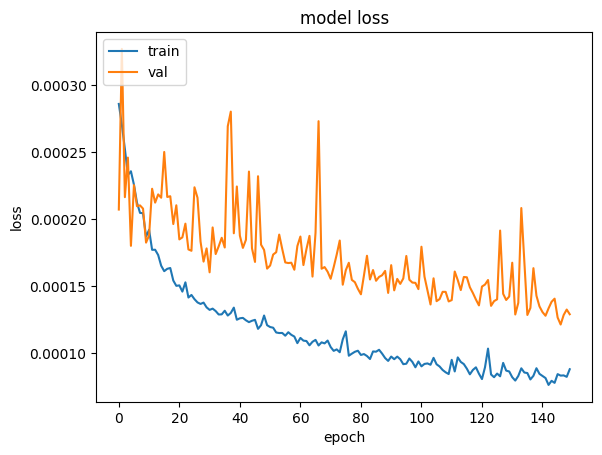

In [23]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error


y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_validate)


#inverse
y_train_inv = t_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = t_transformer.inverse_transform(y_test.reshape((len(y_test), 1)))
y_pred_inv = t_transformer.inverse_transform(y_pred)

y_validate_inv = t_transformer.inverse_transform(y_validate.reshape(-1, 1))

y_pred_train_inv = t_transformer.inverse_transform(y_pred_train)
y_pred_val_inv = t_transformer.inverse_transform(y_pred_val)

69/69 [==============================] - 2s 27ms/step


In [25]:
# calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print('Test RMSE: %.9f' % rmse)


# calculate MAE
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test_inv, y_pred_inv)
print('Test MAE: %.9f' % mae)


# calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print('Test MAPE: %.9f' % mape)

# calculate NRMSE
actual_test=y_test_inv
Nrmse_test=rmse /(actual_test.max() - actual_test.min())
print('Test NRMSE: %.9f' % Nrmse_test)


Test RMSE: 19.971315475
Test MAE: 10.992214461
Test MAPE: 0.018536575
Test NRMSE: 0.027048547


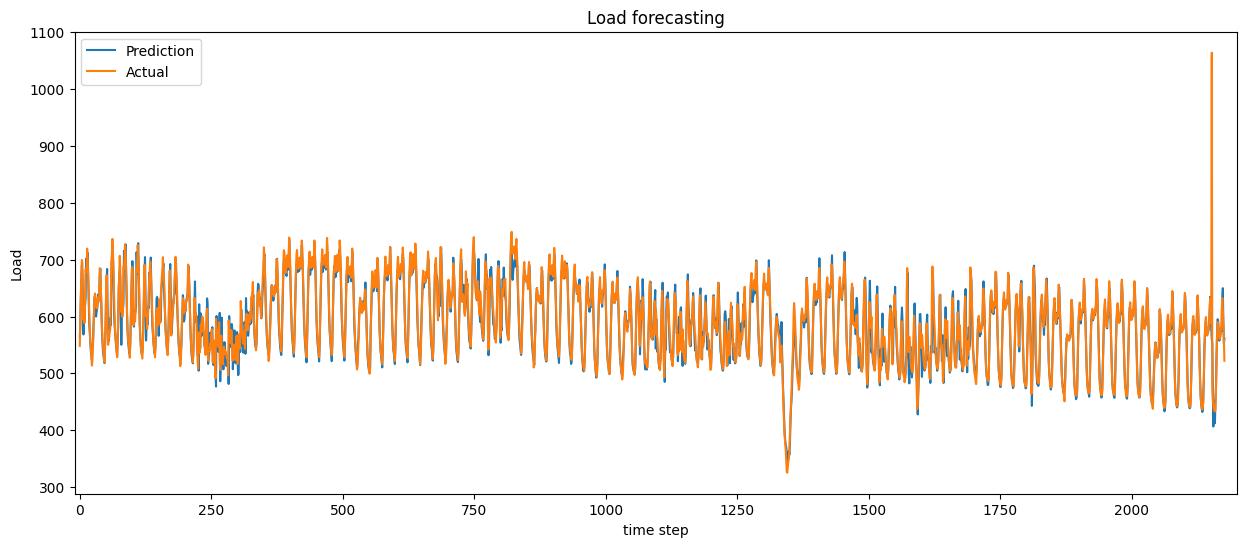

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(15,6))

plt.plot(y_pred_inv, label="Prediction" )
plt.plot(y_test_inv, label="Actual")
plt.legend()
plt.ylabel('Load')
plt.xlabel('time step' )
#plt.title ("Russell 2000 Adj close Price prediction- with MAE {:10.4f}".format(mae))
plt.title ('Load forecasting')

plt.xlim(
  xmin=-10, xmax=2200
)
plt.show()


plt.savefig("t2m.svg")
plt.savefig("t2m.png", format="png", dpi=300)
plt.savefig('t2m.eps', format='eps')




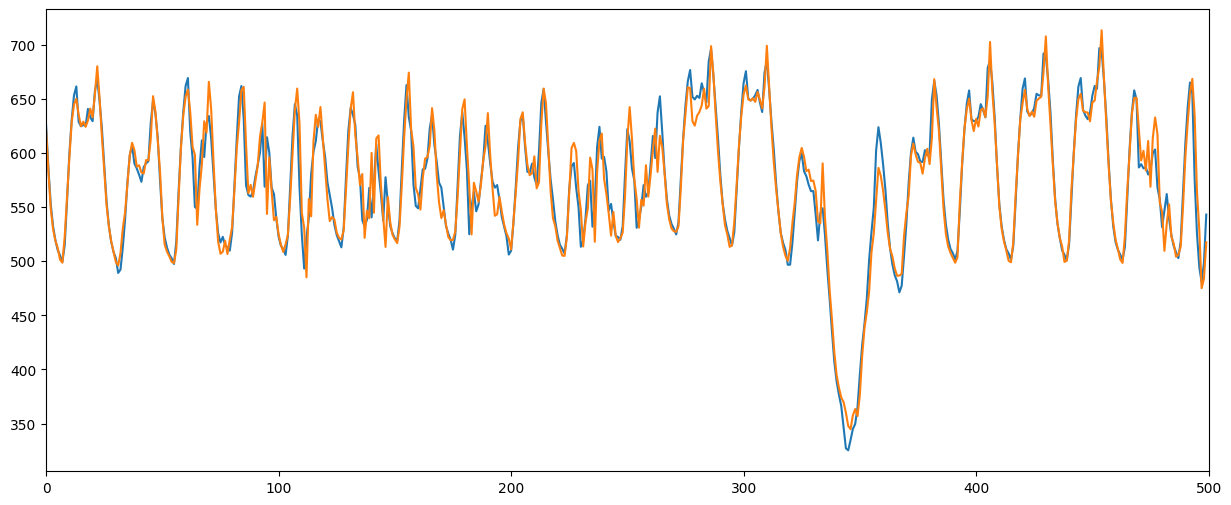

<Figure size 640x480 with 0 Axes>

In [63]:
#zoom in spikes


plt.figure(figsize=(15,6))

plt.plot(y_test_inv[1000:1500])
plt.plot(y_pred_inv[1000:1500])
plt.xlim(
  xmin=0, xmax=500
)
plt.show()




plt.savefig("t2m_zoomin.svg")
plt.savefig("t2m_zoomin.png", format="png", dpi=300)
plt.savefig('t2m_zoomin.eps', format='eps')
